/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Prediction for Sunny & Mild: Yes


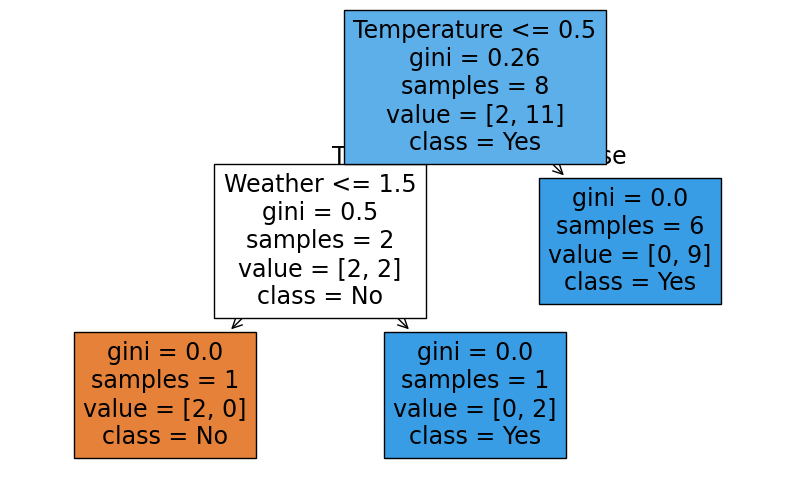

In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Step 2: Create dataset
data = {
    'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Hot', 'Mild', 'Cool'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Step 3: Convert words into numbers
le_weather = LabelEncoder()
le_temp = LabelEncoder()
le_play = LabelEncoder()

df['Weather_n'] = le_weather.fit_transform(df['Weather'])
df['Temperature_n'] = le_temp.fit_transform(df['Temperature'])
df['Play_n'] = le_play.fit_transform(df['Play'])

# Step 4: Prepare data
X = df[['Weather_n', 'Temperature_n']]
y = df['Play_n']

# Step 5: Train Random Forest model
model = RandomForestClassifier(n_estimators=5, random_state=42)
model.fit(X, y)

# Step 6: Make a prediction
prediction = model.predict([[le_weather.transform(['Sunny'])[0], le_temp.transform(['Mild'])[0]]])
print("Prediction for Sunny & Mild:", le_play.inverse_transform(prediction)[0])

# Step 7: Visualize one tree from the forest
plt.figure(figsize=(10,6))
tree.plot_tree(model.estimators_[0], feature_names=['Weather', 'Temperature'], class_names=['No', 'Yes'], filled=True)
plt.show()
